In [1]:
import os
import json
import pickle
import xgboost
from base import ModelHelper

%load_ext autoreload
%autoreload 2

In [2]:
model_helper = ModelHelper("./combat_overfit", "combat_overfit")
model_helper

Model Folder = ./combat_overfit
Metadata Folder = ./combat_overfit/metadata
Path to data = ./raw-data/full_data.gz
Path to test data = ./raw-data/test_labelled.gz
Path to evaluation folder = ./combat_overfit/evaluation
Seed = 1

In [3]:
df = model_helper.prepare_data(model_helper.path_to_full_data)
test = model_helper.prepare_data(model_helper.path_to_test_data)

In [4]:
X_train = df[[col for col in df.columns if col != 'target']]
y_train = df['target']
X_test = test[[col for col in df.columns if col != 'target']]
y_test = test['target']

In [5]:
params = {
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "max_depth": 3,
    "early_stopping_rounds": 10,
    "gamma": 10
}

xgb_model = xgboost.XGBClassifier(**params, random_state=model_helper.seed)
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb_model.fit(X_train, y_train, eval_set=eval_set, verbose=True)
model_helper.model = xgb_model

[18:44:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-error:0.01063	validation_1-error:0.08707
[1]	validation_0-error:0.01216	validation_1-error:0.09198
[2]	validation_0-error:0.00623	validation_1-error:0.07813
[3]	validation_0-error:0.00554	validation_1-error:0.07640
[4]	validation_0-error:0.00682	validation_1-error:0.07988
[5]	validation_0-error:0.00359	validation_1-error:0.07722
[6]	validation_0-error:0.00379	validation_1-error:0.08048
[7]	validation_0-error:0.00261	validation_1-error:0.07516
[8]	validation_0-error:0.00248	validation_1-error:0.07434
[9]	validation_0-error:0.00249	validation_1-error:0.07988
[10]	validation_0-er

In [6]:
print(model_helper.model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=10, gamma=10, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [7]:
model_helper.save_model()

              precision    recall  f1-score   support

      normal       0.91      0.99      0.95     47913
      attack       0.99      0.84      0.91     29378

    accuracy                           0.93     77291
   macro avg       0.95      0.92      0.93     77291
weighted avg       0.94      0.93      0.93     77291



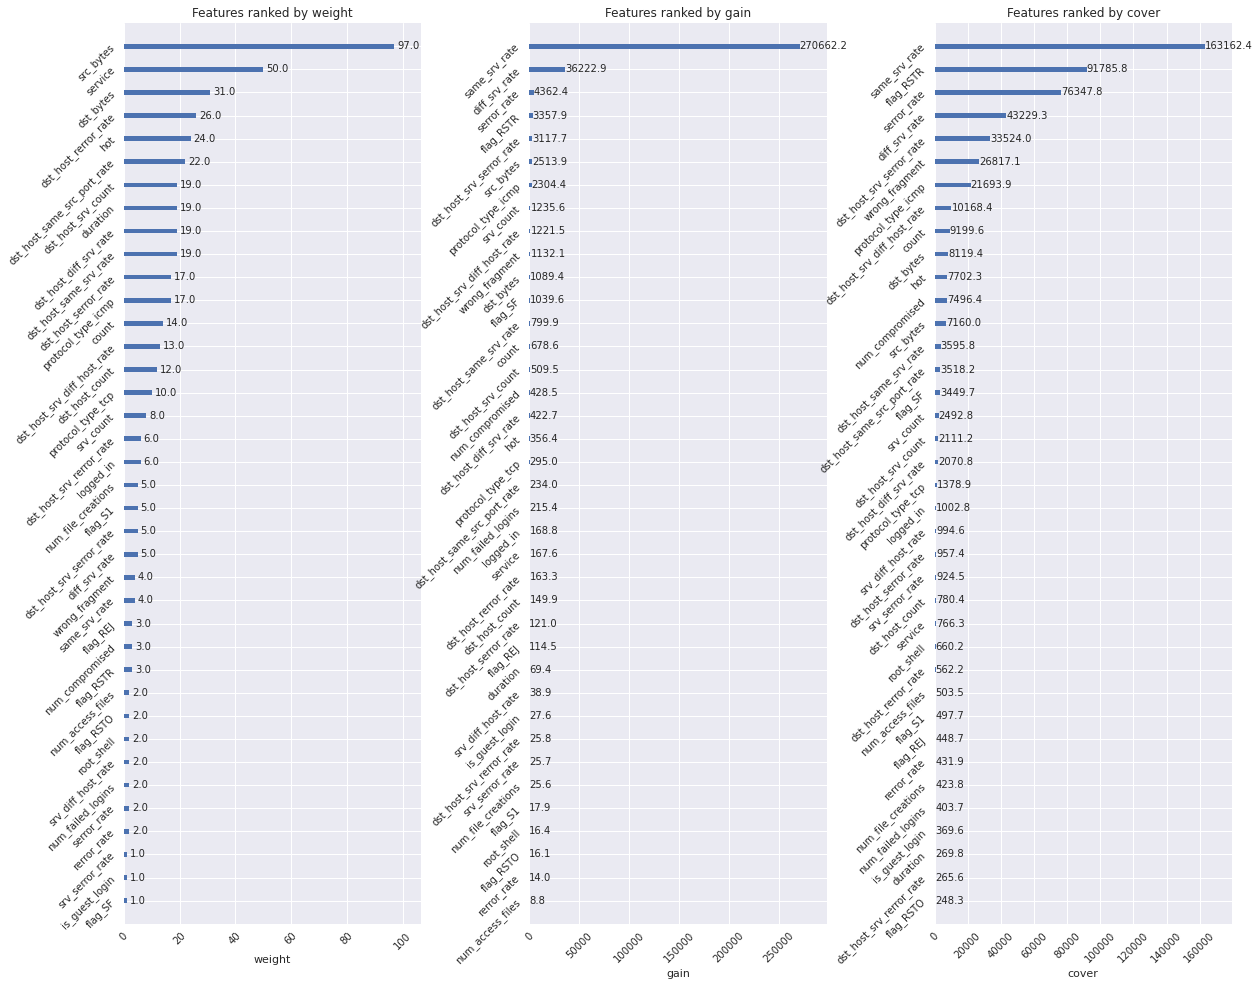

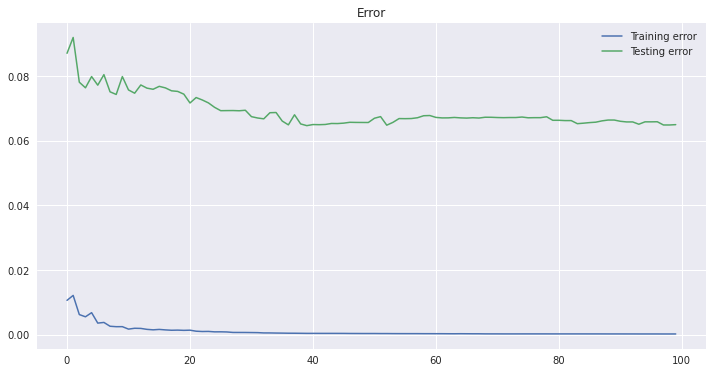

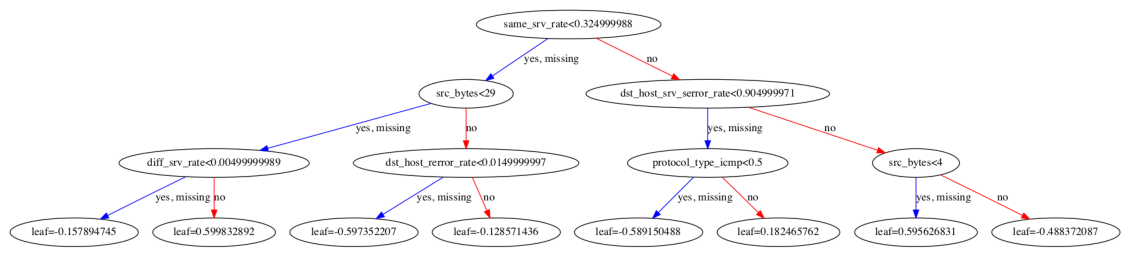

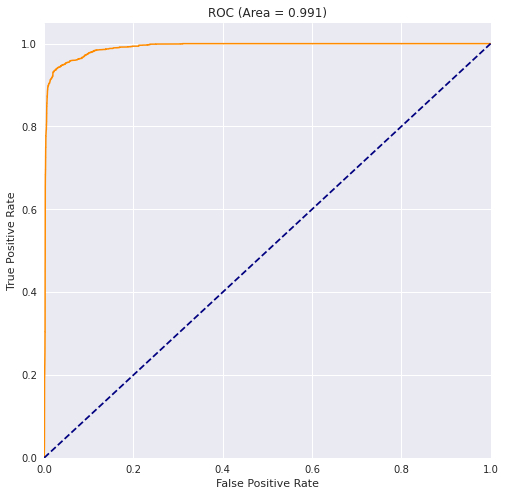

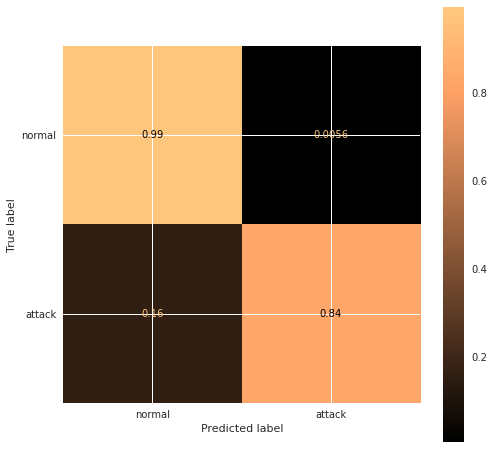

In [8]:
evaluation = model_helper.evaluate_model(X_test, y_test)

In [9]:
evaluation

{'accuracy': 0.9349989002600562,
 'balanced_accuracy': 0.8325035110377468,
 'prfs': {'precision': {'normal': 0.9092227544224567,
   'attack': 0.9892719382835101},
  'recall': {'normal': 0.9944273996618872, 'attack': 0.8380761113758595},
  'f1_score': {'normal': 0.9499182583037601, 'attack': 0.9074190100615487},
  'support': {'normal': 47913.0, 'attack': 29378.0}},
 'test_target_proportions': {False: 0.6199039991719605,
  True: 0.38009600082803946},
 'model_params': {'objective': 'binary:logistic',
  'base_score': 0.5,
  'booster': 'gbtree',
  'colsample_bylevel': 1,
  'colsample_bynode': 1,
  'colsample_bytree': 0.8,
  'gamma': 10,
  'gpu_id': -1,
  'importance_type': 'gain',
  'interaction_constraints': '',
  'learning_rate': 0.300000012,
  'max_delta_step': 0,
  'max_depth': 3,
  'min_child_weight': 1,
  'missing': nan,
  'monotone_constraints': '()',
  'n_estimators': 100,
  'n_jobs': 0,
  'num_parallel_tree': 1,
  'random_state': 1,
  'reg_alpha': 0,
  'reg_lambda': 1,
  'scale_pos